<a href="https://colab.research.google.com/github/jacksonguedes/Int.Art._Mach.Learnig/blob/main/L%C3%B3gica_Difusa_(FUZZY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - Exemplo das gorjetas - créditos: Jones Granatyr, IA Expert Academy  

**Antecedentes (Entradas)**

Serviço: Que nota você daria para o serviço, em uma escala de 0 a 10?  

*   ruim, aceitável, ótimo  

Qualidade da comida: Quão boa estava a comida, em uma escala de 0 a 10?  

*   ruim, boa, saborosa  

**Consequentes (Saídas)**  

Gorjeta: Quanta gorjeta você daria, 0% e 20%?  


*   baixa, média, alta  

Regras  


*   Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
*   Se o serviço for *médio* então a gorjeta será *média*
*   Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*

Importando as bibliotecas

In [5]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=6751e0a41ee913e07e587f01f713fa75e035f1b880663eb613d89461caf39071
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando o Universo  

Universo da variável antecedente. Valores possíveis para a entrada

In [7]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

Verificando as variáveis

In [5]:
qualidade

Antecedent: qualidade

In [6]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Criando a variável consequente, ou seja, o resultado (Saída)

In [8]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta') # Criação de um consequente com um universo que varia de 0% a 20%

Verificando as variáveis

In [10]:
gorjeta

Consequent: gorjeta

In [9]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

# Membership Functions

In [9]:
qualidade.automf(number = 3, names = ['ruim', 'boa', 'saborosa']) # Automatically populate the universe with membership functions.
                                                                  # Encaixando as faixas (ruim, boa, saborosa, aceitável e ótimo) nos valores entre 0 e 10
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])

## Visualizando o gráfico qualidade x membership

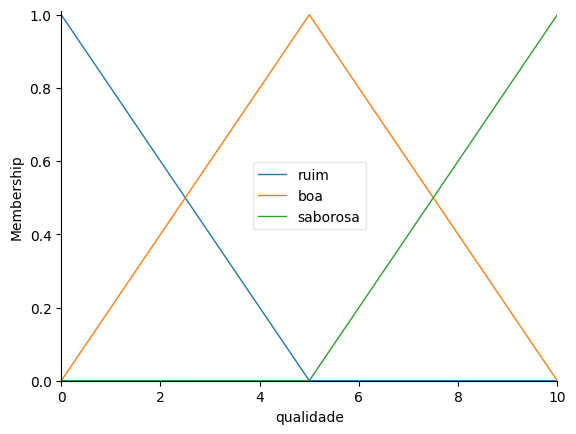

In [16]:
qualidade.view()

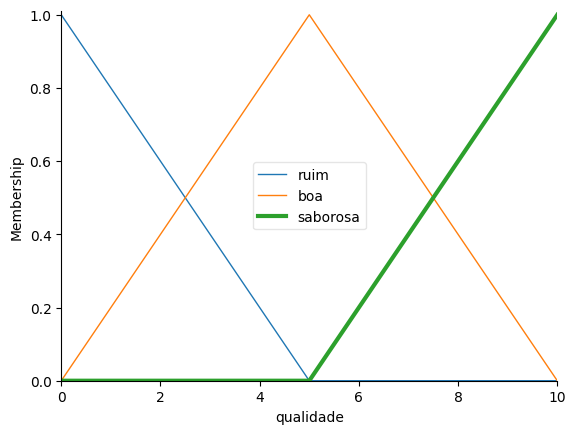

In [17]:
qualidade['saborosa'].view()

## Visualizando grpafico serviço x membership

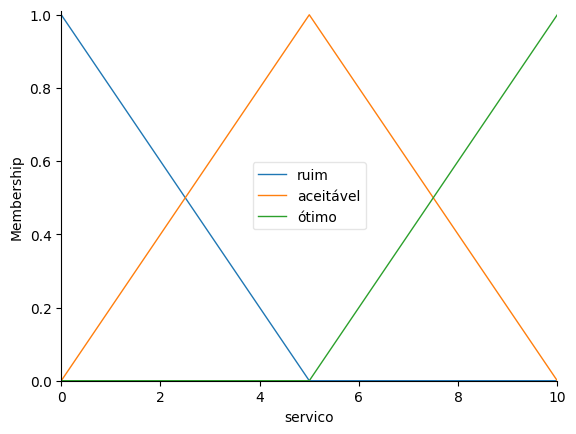

In [18]:
servico.view()

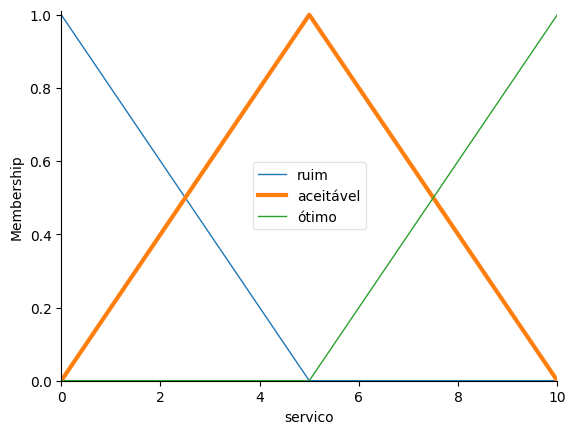

In [19]:
servico['aceitável'].view()

In [20]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Modificando valores no gráfico de gorjeta

In [10]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 2, 6])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [5, 10, 15])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 20, 20])

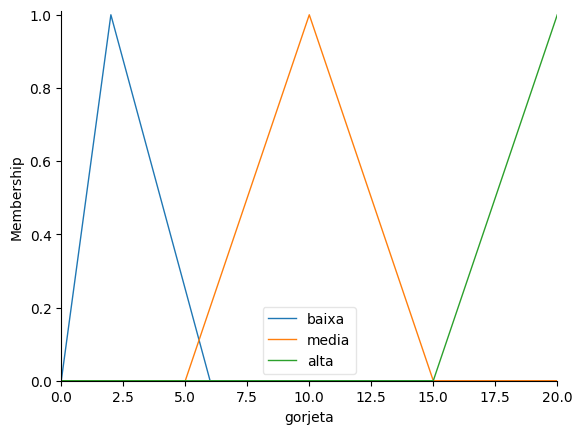

In [11]:
gorjeta.view()

## Definindo as Regras

In [12]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [13]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [14]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [15]:
sistema.input['qualidade'] = 8.5
sistema.input['servico'] = 3
sistema.compute()

10.584137383363117


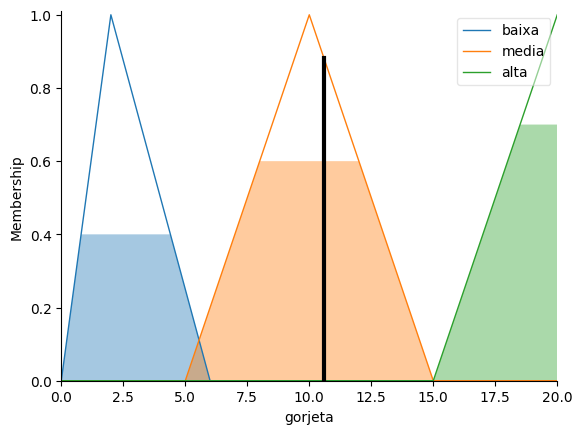

In [16]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)